In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import logging
import logging
logging.basicConfig(filename='model.log',level=logging.INFO, filemode='w', format='%(asctime)s - %(levelname)s - %(message)s')

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
url1="https://raw.githubusercontent.com/Frisk516/Diabetes_and_Cardio_MLmodel/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv"
url2="https://raw.githubusercontent.com/Frisk516/Diabetes_and_Cardio_MLmodel/refs/heads/main/cardio_train.csv"
df1=pd.read_csv(url1)
df2=pd.read_csv(url2,sep=';')
df1.sample(frac=1)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
78360,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
229219,0.0,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,3.0,8.0
91277,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,5.0,0.0,0.0,0.0,3.0,5.0,7.0
114302,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,1.0
76465,0.0,1.0,1.0,1.0,79.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157575,0.0,1.0,1.0,1.0,36.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,1.0,12.0,5.0,6.0
235586,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,20.0,0.0,0.0,0.0,13.0,4.0,4.0
7841,0.0,0.0,1.0,1.0,21.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,21.0,0.0,0.0,13.0,5.0,8.0
96760,0.0,1.0,1.0,1.0,33.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,4.0,10.0,30.0,1.0,0.0,9.0,6.0,2.0


In [3]:
df2.sample(frac=1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
19847,28339,23482,2,177,82.0,150,100,3,1,0,0,1,1
48399,69107,20870,1,159,79.0,150,100,1,1,0,0,1,1
1166,1623,23376,1,165,73.0,120,80,1,1,0,0,1,0
47830,68308,19576,2,176,97.0,160,100,2,2,0,0,1,1
32957,47080,20464,1,163,81.0,140,90,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21755,31064,21203,1,160,65.0,100,60,1,1,0,0,1,0
36127,51597,21096,2,173,76.0,140,90,2,1,1,0,1,1
63804,91095,17623,1,158,80.0,120,80,1,1,0,0,1,1
24320,34752,19476,1,164,74.0,120,90,1,1,0,0,0,0


In [4]:
if 'Diabetes_012' in df1.columns:
    diabetes=df1
    # Convert to binary: 0 = no diabetes, 1 or 2 = diabetes/prediabetes
    diabetes['target'] = diabetes['Diabetes_012'].apply(lambda x: 0 if x==0 else 1)
elif 'Diabetes_binary' in diabetes.columns:
    diabetes['target'] = diabetes['Diabetes_binary']
else:
    raise ValueError("No diabetes target column found!")



In [5]:
diabetes_features = diabetes[['target', 'Age', 'Sex', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity']]
cardio = df2
cardio_features = cardio[['cardio', 'age', 'gender', 'ap_hi', 'ap_lo', 'weight', 'smoke', 'active']]


In [6]:
diabetes_features.rename(columns={
    'Age':'age',
    'Sex':'gender',
    'HighBP':'high_bp',
    'HighChol':'high_chol',
    'BMI':'bmi',
    'Smoker':'smoker',
    'PhysActivity':'active'
}, inplace=True)

cardio_features.rename(columns={
    'cardio':'target',
    'ap_hi':'high_bp',      # systolic BP as a proxy
    'ap_lo':'high_chol',    # diastolic BP as a proxy
    'weight':'bmi'
}, inplace=True)

In [7]:
#combining datasets vertically since there's no common target
combined = pd.concat([diabetes_features, cardio_features], ignore_index=True)

In [8]:
#checking for null
combined.isnull().sum()


,0
target,0
age,0
gender,0
high_bp,0
high_chol,0
bmi,0
smoker,70000
active,0
smoke,253680


In [9]:
#imputing null with median
combined['smoker'].fillna(combined['smoker'].median(), inplace=True)
combined['smoke'].fillna(combined['smoke'].median(), inplace=True)

In [10]:
combined.isnull().sum()

,0
target,0
age,0
gender,0
high_bp,0
high_chol,0
bmi,0
smoker,0
active,0
smoke,0


In [11]:
#separating numerical and categorical columns
numerical = combined.select_dtypes(exclude=['object'])
categorical = combined.select_dtypes(include=['object'])


In [12]:
#performing EDA
from collections import OrderedDict
stats=[]
for i in numerical.columns:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':numerical[i].mean(),
        'median':numerical[i].median(),
        'mode':numerical[i].mode()[0],
        'std':numerical[i].std(),
        'min':numerical[i].min(),
        'max':numerical[i].max()
    })
    stats.append(numerical_stats)
report=pd.DataFrame(stats)


#checking outliers
outlier_label = []
for col in report['feature']:
    Q1 = combined[col].quantile(0.25)
    Q3 = combined[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = combined[(combined[col] < LW) | (combined[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

report

,feature,mean,median,mode,std,min,max,Outlier Comment
0,target,0.231574,0.0,0.0,0.421839,0.0,1.0,Has Outliers
1,age,4216.689925,9.0,9.0,8093.691634,1.0,23713.0,Has Outliers
2,gender,0.636975,1.0,1.0,0.618416,0.0,2.0,No Outliers
3,high_bp,28.194634,1.0,0.0,89.014876,-150.0,16020.0,Has Outliers
4,high_chol,21.229980,1.0,0.0,96.181868,-70.0,11000.0,Has Outliers
5,bmi,38.292253,29.0,27.0,20.855364,10.0,200.0,Has Outliers
6,smoker,0.347328,0.0,0.0,0.476122,0.0,1.0,No Outliers
7,active,0.766748,1.0,1.0,0.422902,0.0,1.0,Has Outliers
8,smoke,0.019059,0.0,0.0,0.136732,0.0,1.0,Has Outliers


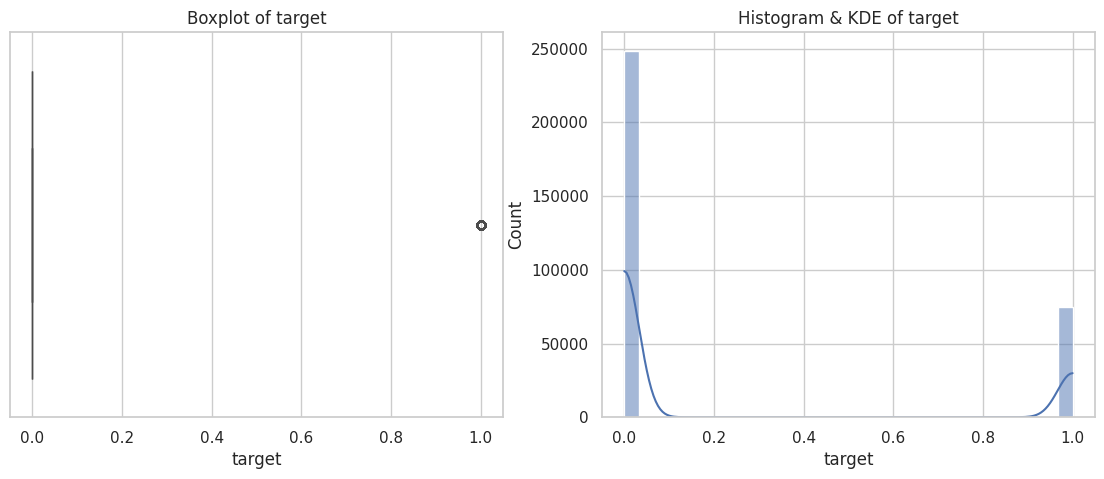

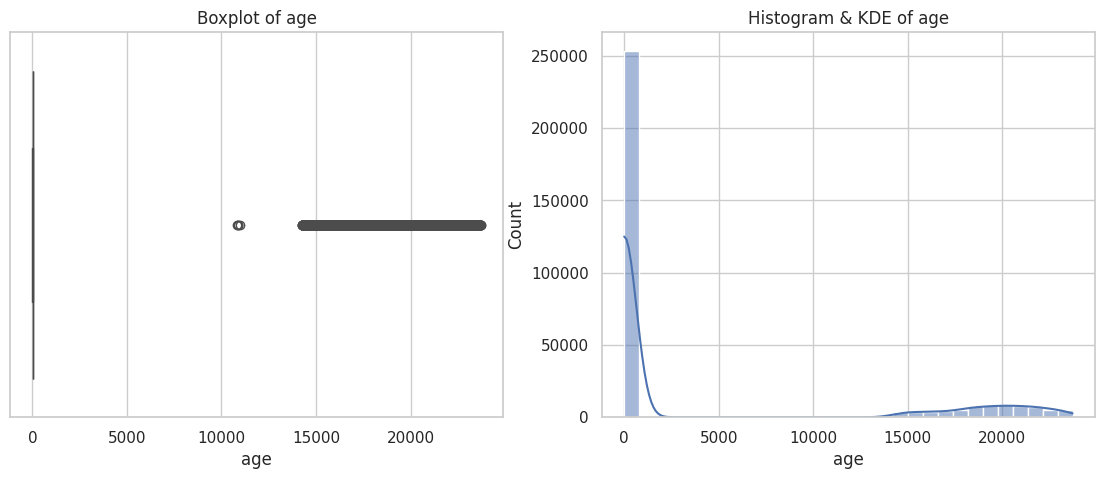

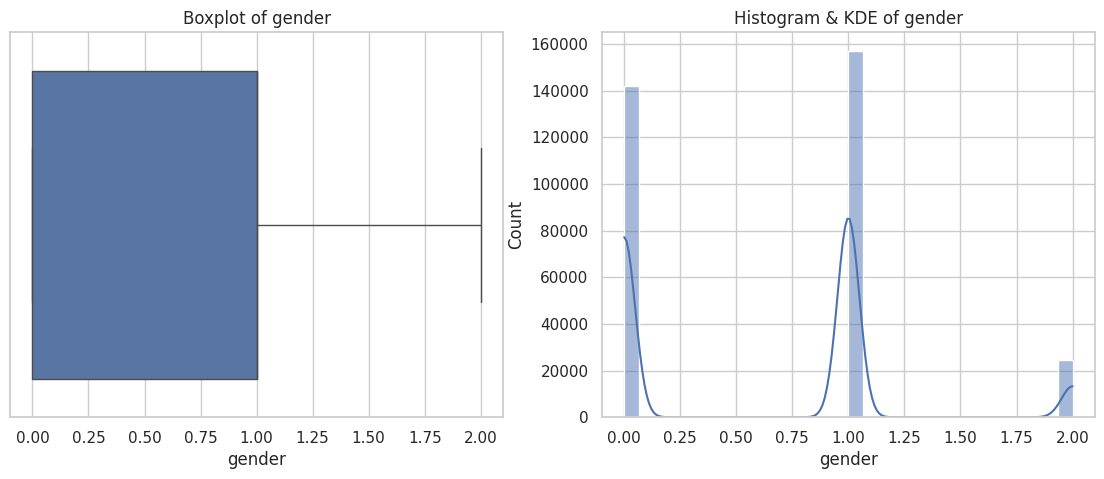

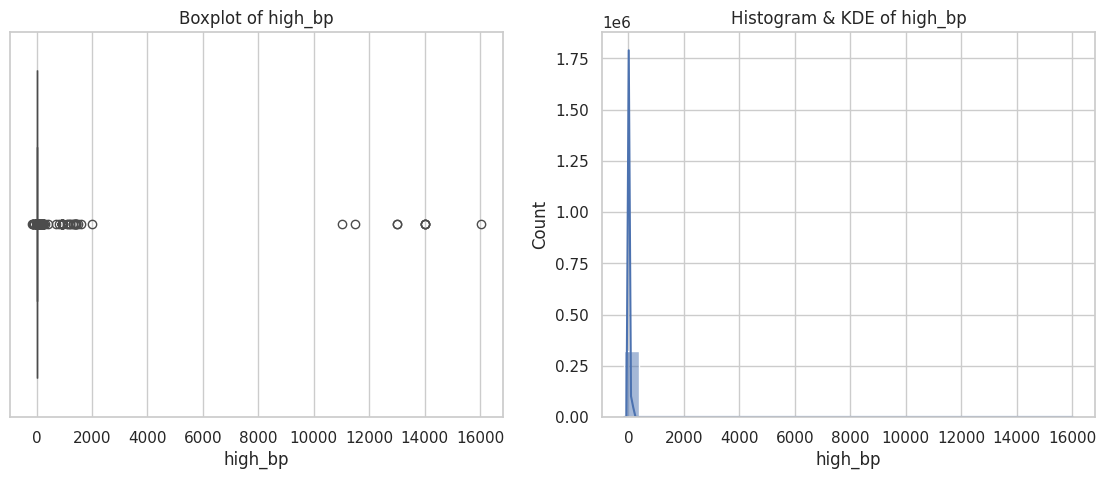

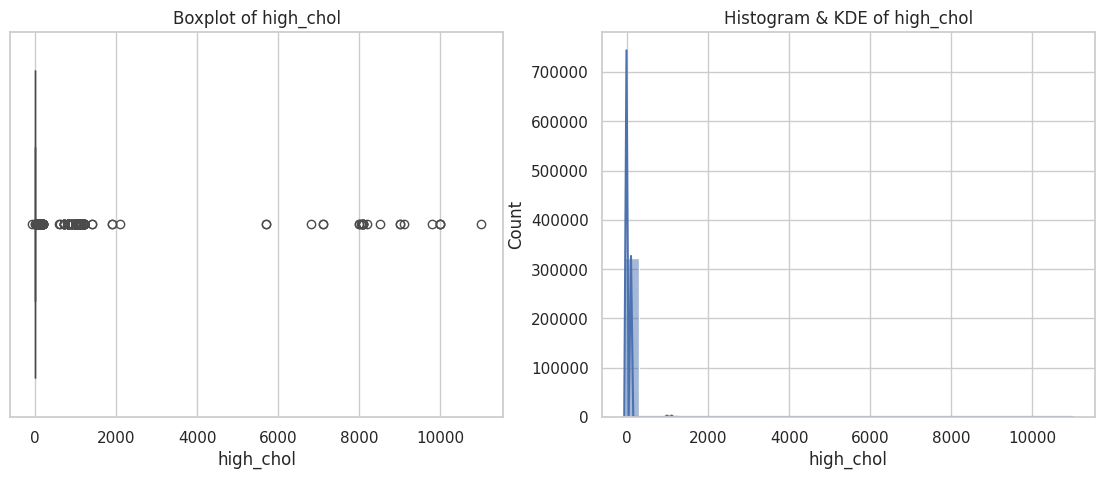

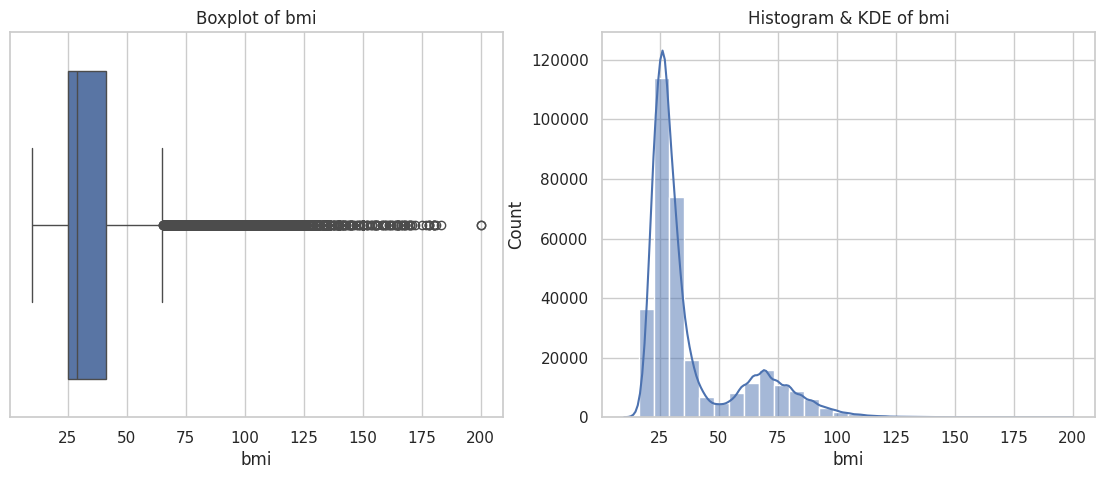

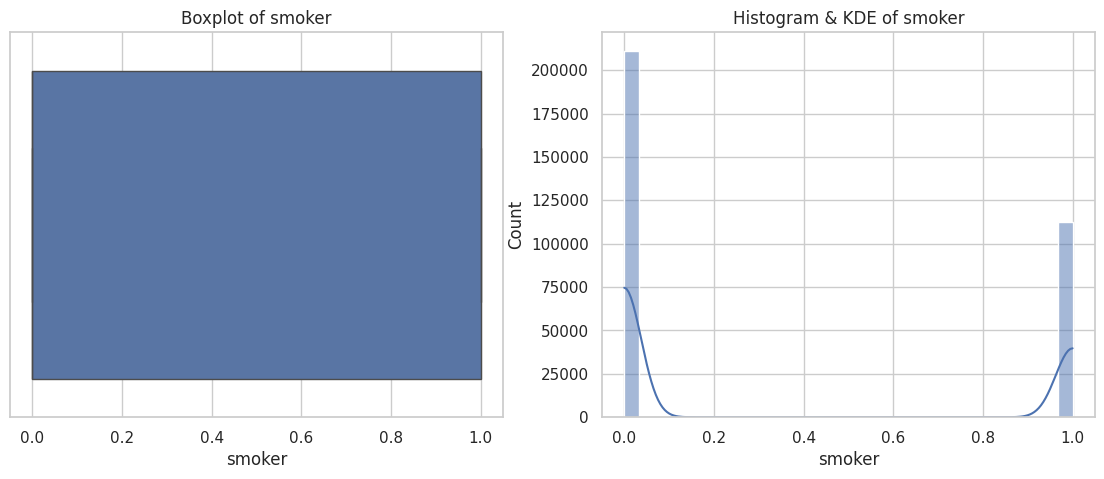

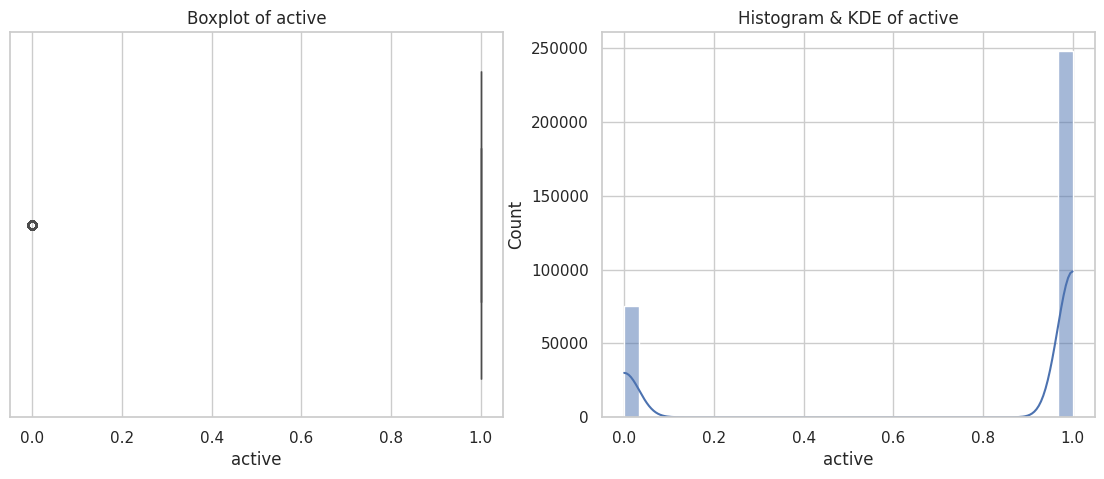

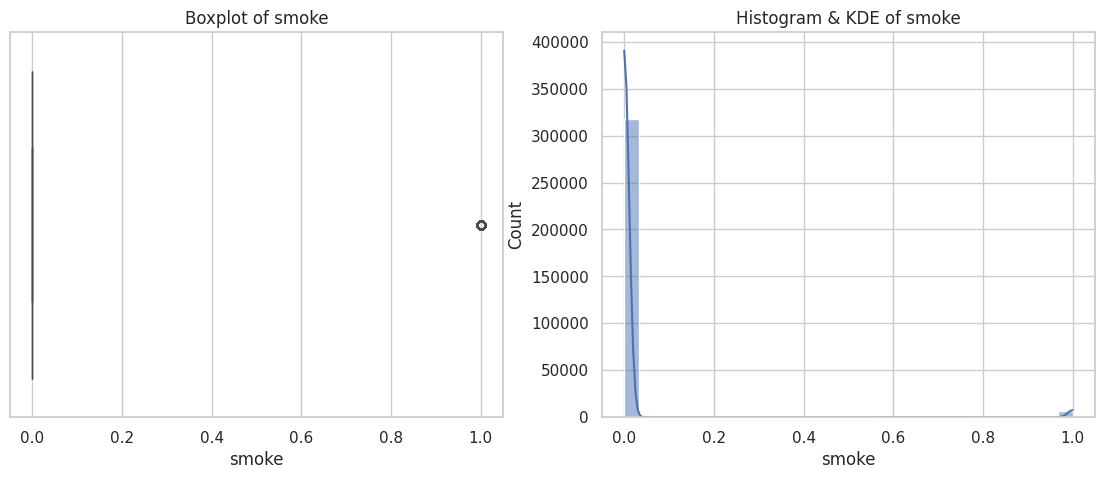

In [13]:
#checking plots for outliers and such
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in combined:
    plt.figure(figsize=(14, 5))

    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=combined[col])
    plt.title(f'Boxplot of {col}')

    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(combined[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')

    plt.show()

In [14]:
#using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in combined.select_dtypes(include='object').columns:
    combined[col] = le.fit_transform(combined[col])

In [15]:
#train test split to prevent data leak

from sklearn.model_selection import train_test_split
X=combined.drop('target',axis=1)
y=combined['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#using FNN as the target column is binary
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(16, activation='relu'),                                   # Hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer for binary classification
])

# Compile the model with optimizer, loss, and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
5665/5665 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7512 - loss: 11.8410 - val_accuracy: 0.7785 - val_loss: 1.0436
Epoch 2/30
5665/5665 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7723 - loss: 3.0380 - val_accuracy: 0.7704 - val_loss: 7.9782
Epoch 3/30
5665/5665 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7723 - loss: 2.0623 - val_accuracy: 0.7710 - val_loss: 4.3203
Epoch 4/30
5665/5665 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7721 - loss: 1.3080 - val_accuracy: 0.7716 - val_loss: 1.1331
Epoch 5/30
5665/5665 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7752 - loss: 0.9632 - val_accuracy: 0.7738 - val_loss: 0.6301
Epoch 6/30
5665/5665 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7765 - loss: 0.8529 - val_accuracy: 0.7705 - val_loss: 2.1522
Epoch 7/30
5665/5665 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7760 - loss: 0.6905 - val_accuracy: 0.7744 - val_loss: 0.5434
Epoch 8/30
5665/5665 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7798 - loss: 

In [18]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict classes
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


3035/3035 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7934 - loss: 0.4228
Test Accuracy: 0.7925
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
[[65276  9149]
 [10999 11680]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     74425
           1       0.56      0.52      0.54     22679

    accuracy                           0.79     97104
   macro avg       0.71      0.70      0.70     97104
weighted avg       0.79      0.79      0.79     97104

